### Definitions and stuff

In [1]:
using Revise, Plots, Random, FFTW

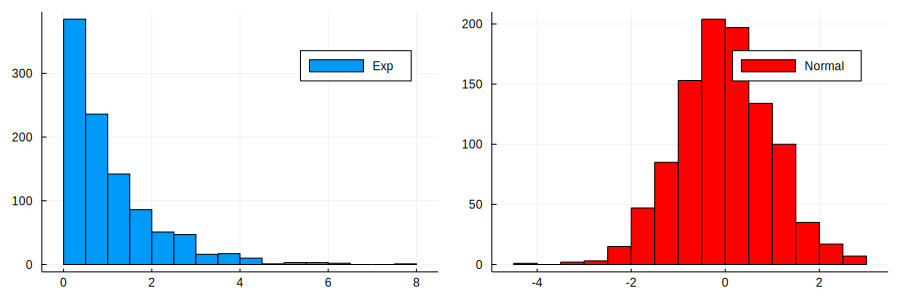

In [2]:
plot(histogram(randexp(1000), label = "Exp"), histogram(randn(1000), label = "Normal", c = :red), size = (900,300), layout = @layout [a b])

In [110]:
f1(t::Real)::ComplexF64 = exp(im*2pi*t);
f2(t::Real, δφ::Real = 0.0)::ComplexF64 = exp(im*(2pi*t + δφ));

In [111]:
f(t::Real, δφ::Real = 0.0)::ComplexF64 = (f1(t) + f2(t, δφ))/2 ;
i(t::Real, δφ::Real = 0.0)::Float64 = abs(f(t, δφ))^2;

In [112]:
function τ(tarr::AbstractArray{Float64, 1}, tau::Real)::Integer
    @assert length(tarr) > 0
    @assert tau < tarr[end]
    i = 2
    while i < length(tarr)
        if tarr[i] >= tau && tarr[i-1] <= tau
            return i
        end
        i += 1
    end
end

τ (generic function with 1 method)

In [157]:
# list autocorrelation function
gA(tau::Real, y::Array{ComplexF64, 1}, dt::Real)::ComplexF64 = sum(conj.(y[1:end-τ(trng, tau)]) .* y[τ(trng, tau)+1:end])/sum(conj.(y[1:end-τ(trng, tau)]) .* y[1:end-τ(trng, tau)])

gA (generic function with 2 methods)

In [195]:
trange(tmax::Real) = 0:0.01:tmax

function prange(trange::AbstractArray{Float64, 1}, noisePower::Float64)
    prng = noisePower * randexp(length(trange))
    mean = sum(prng)/length(prng)
    prng = prng .- mean
    keep = copy(prng)
    for i in 2:1:length(prng)
        prng[i] = (prng[i-1] + prng[i])%(2pi) #reduce(+, prng[1:i])%(2pi)
    end
    (keep, prng)
end

t0 = 40.
trng = trange(t0)
dt = trng[2] - trng[1]

function plotCoherence(noisePower::Real)
    noisePower == 0. ? noise = 1E-6 : noise = noisePower
    keep, accPhaseNoise = prange(trng, noise)

    Yf = f.(trng, accPhaseNoise)
    Yi = abs.(conj.(Yf) .* Yf)

    τlist = []
    glist = []
    for tau in trng[1:end - τ(trng, 0.5t0)]    
        push!(τlist, tau)
        push!(glist, gA(tau, Yf, dt))
    end

    gplot = plot(τlist, real.(glist), label = "g¹(tau)", frame = :box, title = "g¹(tau)", titlefontsize = 9, title_location = :right, legend = false)
    ylims!(gplot, (-1.1,1.1))

    plotf = plot(trng, real.(Yf), legend = false, frame = :box, title = "E-fields", title_location = :right, titlefontsize = 9)
    ploti = plot(trng, Yi, legend=false, frame = :box, title = "Intensity", title_location = :right, titlefontsize = 9)
    ylims!(ploti, (0,1.1))

    plot0 = plot(plotf, ploti, gplot, size = (900,200), layout = @layout [a b c])
    xlims!(plot0, (0, 0.5t0))
end


function plotSingleCoherence(noisePower::Real)
    noisePower == 0. ? noise = 1E-6 : noise = noisePower
    keep, accPhaseNoise = prange(trng, noise)

    Yf = f2.(trng, accPhaseNoise)
    Yi = abs.(conj.(Yf) .* Yf)

    τlist = []
    glist = []
    for tau in trng[1:end - τ(trng, 0.5t0)]    
        push!(τlist, tau)
        push!(glist, gA(tau, Yf, dt))
    end

    gplot = plot(τlist, real.(glist), label = "g¹(tau)", frame = :box, title = "g¹(tau)", titlefontsize = 9, title_location = :right, legend = false)
    ylims!(gplot, (-1.1,1.1))

    plotf = plot(trng, real.(Yf), legend = false, frame = :box, title = "E-fields", title_location = :right, titlefontsize = 9)
    ploti = plot(trng, Yi, legend=false, frame = :box, title = "Intensity", title_location = :right, titlefontsize = 9)
    ylims!(ploti, (0,1.1))

    plot0 = plot(plotf, ploti, gplot, size = (900,200), layout = @layout [a b c])
    xlims!(plot0, (0, 0.5t0))
    end;

### Single-wave autocorrelation 

***This is single-wave autocorrelation (1st order) with random Lorentzian phase noise.***

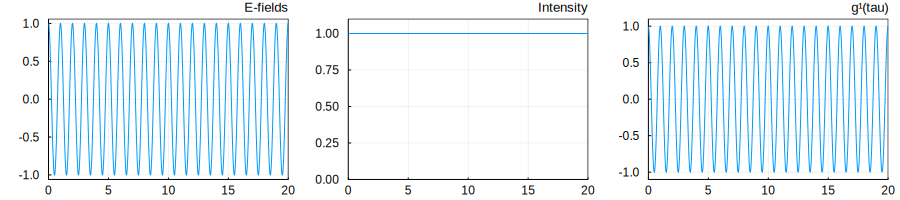

In [197]:
plotSingleCoherence(0)

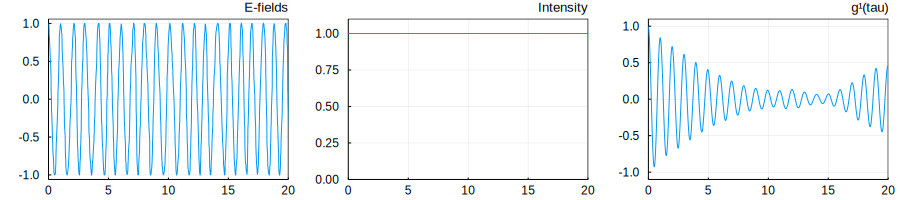

In [210]:
plotSingleCoherence(0.05)

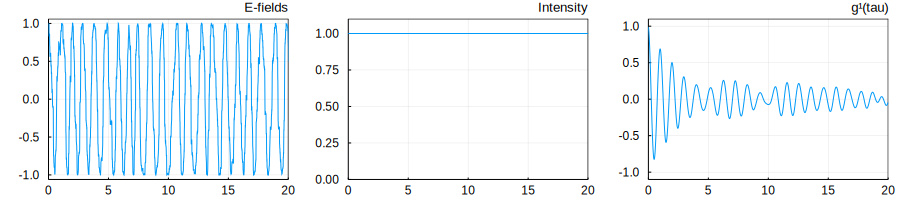

In [200]:
plotSingleCoherence(0.1)

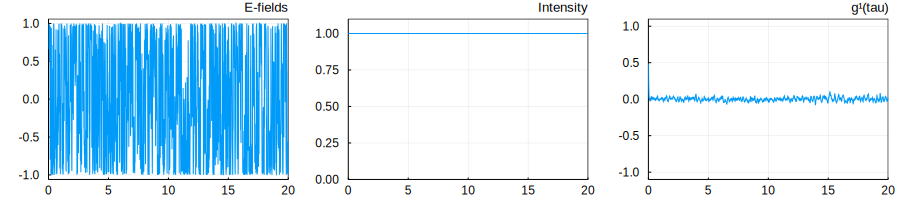

In [201]:
plotSingleCoherence(1.0)

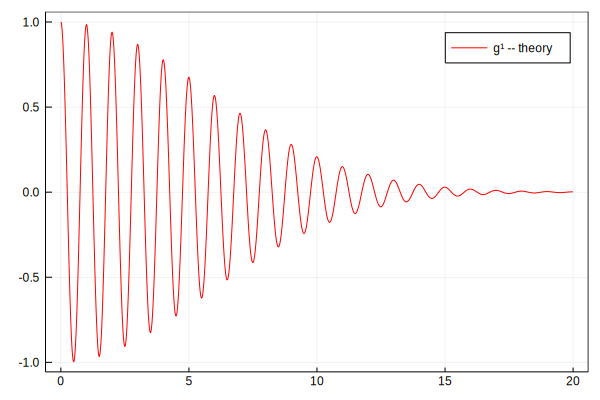

In [137]:
# Theory
gth(tau::Real, tau_c::Real = 10.)::Float64 = real(exp(-im*2pi*tau) * exp(-(pi/2)*(tau/tau_c)^2))
plot(trng[1:Int(floor(end/2))], gth.(trng[1:Int(floor(end/2))]), c= :red, label = "g¹ -- theory", frame = :box)

### 2-wave interference and correlation (λ₁ = λ₂, δL = 0 & random relative phase noise)

***This is interference between two waves with the same λ and zero path difference, but cumulative random relative phase noise.***

(Correlation is - possibly - not calculated correctly here, but it was too late to investigate; Left as an exercise.)

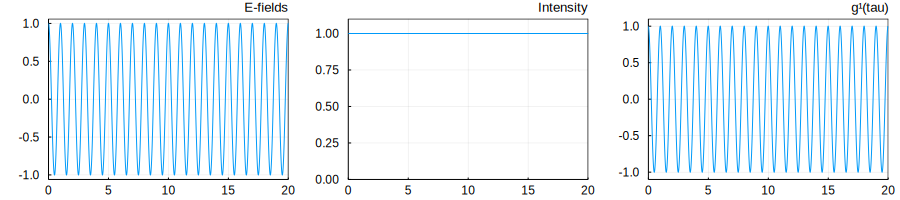

In [211]:
plotCoherence(0.0)

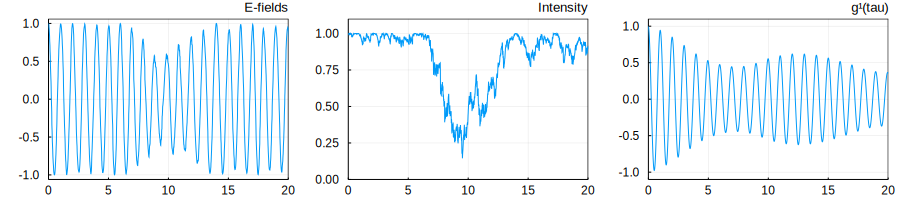

In [212]:
plotCoherence(0.05)

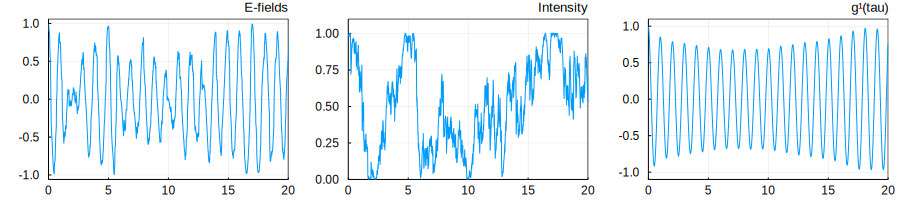

In [213]:
plotCoherence(0.1)

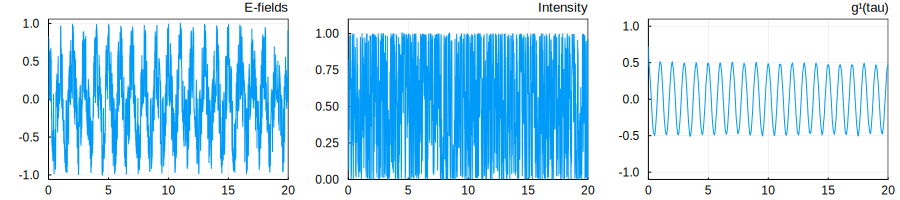

In [214]:
plotCoherence(1.)